In [28]:
%matplotlib inline
from pylab import *
import numpy as np
from scipy.stats import beta

In [29]:
%%latex
\begin{align}
p(A) &\sim \beta(\alpha_A, \beta_A) \\
p(B) &\sim \beta(\alpha_B, \beta_B) \\
p(A \mid p(A)>p(B),A=1) &= \beta(\alpha_A+1, \beta_A) \\
p(A \mid p(A)>p(B),A=0) &= \beta(\alpha_A, \beta_A+1) \\
p(B \mid p(A) \leq p(B),B=1) &= \beta(\alpha_B+1, \beta_B) \\
p(B \mid p(A) \leq p(B),B=0) &= \beta(\alpha_B, \beta_B+1)
\end{align}

<IPython.core.display.Latex object>

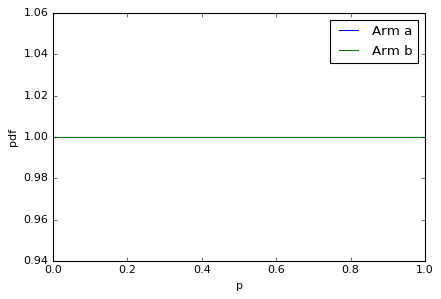

In [30]:
alpha_a, beta_a, alpha_b, beta_b = 1, 1, 1, 1

xs = np.linspace(0,1.0,100)
ys_a = beta.pdf(xs, alpha_a, beta_a)
ys_b = beta.pdf(xs, alpha_b, beta_b)

plt.plot(xs,ys_a,label='Arm a')
plt.plot(xs,ys_b,label='Arm b')
plt.ylabel('pdf')
plt.xlabel('p')
plt.legend()
plt.show()

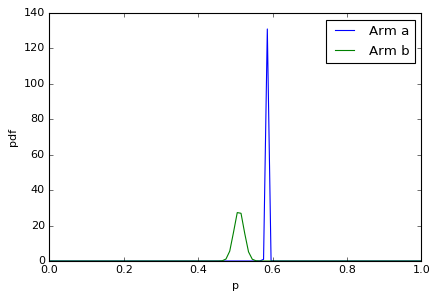

In [33]:
pa, pb = 0.55, 0.5
iterations = 10000

for i in range(iterations):
    sample_a = np.random.beta(alpha_a, beta_a)
    sample_b = np.random.beta(alpha_b, beta_b)
    
    if sample_a > sample_b: # play arm a
        reward_a = (rand() < pa)
        if reward_a == 1:
            alpha_a += 1
        else:
            beta_a += 1
    else:                    # play arm b
        reward_b = (rand() < pb) 
        if reward_b == 1:
            alpha_b += 1
        else:
            beta_b += 1

ys_a = beta.pdf(xs, alpha_a, beta_a)
ys_b = beta.pdf(xs, alpha_b, beta_b)

plt.plot(xs,ys_a,label='Arm a')
plt.plot(xs,ys_b,label='Arm b')
plt.ylabel('pdf')
plt.xlabel('p')
plt.legend()
plt.show()